In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops

2023-07-29 21:31:18.567184: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# tf.compat.v1.disable_eager_execution()

In [3]:
drugs_cell_lines_ic50_df = pd.read_csv("..//data//drugs_cell_lines_ic50.csv")

In [4]:
drugs_cell_lines_ic50_df.head()

,drug_id,Cancer_Cell_Line,IC50
0,1001,ACH-002137,7.258918
1,1004,ACH-002137,-3.802467
2,1005,ACH-002137,4.146364
3,1006,ACH-002137,3.171367
4,1007,ACH-002137,-4.959442


In [5]:
pubchem_drugs_smiles_df = pd.read_csv('..//data//drugs_smile_strings.csv')

In [6]:
pubchem_drugs_smiles_df.head()

,drug_id,Smiles
0,1242,COc1cc(O)c2c(c1)C=CCC(O)C(O)C(=O)C=CCC(C)OC2=O
1,179,O=c1[nH]cc(F)c(=O)[nH]1
2,86,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)...
3,55,COc1cc(-c2nn(C3CCC(N4CCN(C(C)=O)CC4)CC3)c3ncnc...
4,1001,NC(=O)c1ncn(C2OC(COP(=O)(O)O)C(O)C2O)c1N


In [7]:
drugs_smiles_cell_lines_ic50_df = pd.merge(drugs_cell_lines_ic50_df, pubchem_drugs_smiles_df, 
                                             on = "drug_id")

In [8]:
drugs_smiles_cell_lines_ic50_df = drugs_smiles_cell_lines_ic50_df[["drug_id", "Cancer_Cell_Line", "Smiles", "IC50"]]

In [9]:
drugs_smiles_cell_lines_ic50_df.dtypes

drug_id               int64
Cancer_Cell_Line     object
Smiles               object
IC50                float64
dtype: object

In [10]:
drugs_smiles_cell_lines_ic50_df["drug_id"] = drugs_smiles_cell_lines_ic50_df["drug_id"].astype(object)

In [11]:
import pickle

In [12]:
with open("..//data//drug_gcn_features.pickle", "rb") as f:
    dict_features = pickle.load(f)

In [13]:
with open("..//data//drug_gcn_normalized_adj_mats.pickle", "rb") as f:
    dict_normalized_adj_mats = pickle.load(f)

In [14]:
dualgcn_train = pd.read_csv("..//data//DualGCN_Embedding_train.csv")

In [15]:
dualgcn_test = pd.read_csv("..//data//DualGCN_Embedding_test.csv")

In [16]:
pubchem_to_drugs_df = pd.read_csv('../data/GDSC/1.Drug_listMon Jun 24 09_00_55 2019.csv')

In [17]:
pubchem_to_drugs_df = pubchem_to_drugs_df[["drug_id", "PubCHEM"]]

In [18]:
pubchem_to_drugs_df.dtypes

drug_id     int64
PubCHEM    object
dtype: object

In [19]:
import numpy as np

In [20]:
pubchem_to_drugs_df["PubCHEM"] = [val if str(val).isdigit() else np.nan for val in pubchem_to_drugs_df["PubCHEM"] ]

In [21]:
pubchem_to_drugs_df = pubchem_to_drugs_df.dropna()

In [22]:
pubchem_to_drugs_df.dtypes

drug_id     int64
PubCHEM    object
dtype: object

In [23]:
pubchem_to_drugs_df["drug_id"] = pubchem_to_drugs_df["drug_id"].astype(str)

In [24]:
# pubchem_to_drugs_df["drug_id"].values[0]

In [25]:
# '1001' in pubchem_to_drugs_df["drug_id"].values

In [26]:
with open("..//data//drug_gcn_normalized_adj_mats.pickle", "rb") as f:
    dict_normalized_adj_mats = pickle.load(f)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(drugs_smiles_cell_lines_ic50_df.drop(["IC50"],1), drugs_smiles_cell_lines_ic50_df["IC50"].values, 
                                                     test_size = 0.20, random_state = 42)

/tmp/ipykernel_1009770/747247744.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_valid, y_train, y_valid = train_test_split(drugs_smiles_cell_lines_ic50_df.drop(["IC50"],1), drugs_smiles_cell_lines_ic50_df["IC50"].values,


In [29]:
dualgcn_train["Drug_ID"] = dualgcn_train["Drug_ID"].astype(str)

In [30]:
dualgcn_test["Drug_ID"] = dualgcn_test["Drug_ID"].astype(str)

In [31]:
pubchem_to_drugs_df.dtypes

drug_id    object
PubCHEM    object
dtype: object

In [32]:
dualgcn_train = pubchem_to_drugs_df.merge(dualgcn_train, left_on = ["PubCHEM"], right_on = ["Drug_ID"])

In [33]:
dualgcn_train = dualgcn_train[['Cell_Line', 'drug_id']]

In [34]:
dualgcn_test = pubchem_to_drugs_df.merge(dualgcn_test, left_on = ["PubCHEM"], right_on = ["Drug_ID"])

In [35]:
dualgcn_test = dualgcn_test[['Cell_Line', 'drug_id']]

In [36]:
dualgcn_train.head()

,Cell_Line,drug_id
0,ACH-000070,1242
1,ACH-000105,1242
2,ACH-000981,1242
3,ACH-000061,1242
4,ACH-000995,1242


In [37]:
dualgcn_train.dtypes

Cell_Line    object
drug_id      object
dtype: object

In [38]:
# x_train[

In [39]:
x_train.dtypes

drug_id             object
Cancer_Cell_Line    object
Smiles              object
dtype: object

In [40]:
# dualgcn_train

In [41]:
# x_train['drug_id'].values[0]

In [42]:
x_train['drug_id'] = x_train['drug_id'].astype(str)

In [43]:
x_valid['drug_id'] = x_valid['drug_id'].astype(str)

In [44]:
x_train_valid_feats = pd.concat([x_train, x_valid], ignore_index = True)

In [45]:
y_train_valid = pd.concat([pd.DataFrame(y_train.reshape(-1,1)), pd.DataFrame(y_valid.reshape(-1,1))], ignore_index = True)

In [46]:
combo_train_valid = pd.concat([x_train_valid_feats, y_train_valid], 1)

/tmp/ipykernel_1009770/1008667345.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  combo_train_valid = pd.concat([x_train_valid_feats, y_train_valid], 1)


In [47]:
combo_train_valid.head()

,drug_id,Cancer_Cell_Line,Smiles,0
0,1059,ACH-001368,COc1ccc(-c2ccc3c(N4CCOCC4C)nc(N4CCOCC4C)nc3n2)...,1.086644
1,255,ACH-000142,COCC(=O)NCC=Cc1ccc2ncnc(Nc3ccc(Oc4ccc(C)nc4)c(...,4.227800
2,178,ACH-000218,COc1ccc(-c2cc3nccn3c(Nc3ncccc3C(N)=O)n2)cc1OC,0.067505
3,152,ACH-002155,COc1cc2ncnc(-n3nc(-c4ccccn4)nc3N)c2cc1OC,4.894550
4,1243,ACH-000277,COc1cc(C=CC(=O)N2CCC=CC2=O)cc(OC)c1OC,4.572953


In [48]:
combo_train_valid.columns = ['drug_id', 'Cancer_Cell_Line', 'Smiles', 'IC50']

In [49]:
# filter x_train x _valid here
x_y_train = combo_train_valid.merge(dualgcn_train, left_on = ['Cancer_Cell_Line','drug_id'], right_on = [ 'Cell_Line','drug_id'])

In [50]:
x_y_test = combo_train_valid.merge(dualgcn_test, left_on = ['Cancer_Cell_Line','drug_id'], right_on = [ 'Cell_Line','drug_id'])

In [51]:
x_y_test.shape

(17316, 5)

In [52]:
x_train.dtypes

drug_id             object
Cancer_Cell_Line    object
Smiles              object
dtype: object

In [53]:
# x_y_test

In [54]:
x_train, x_valid, y_train, y_valid = x_y_train.drop(["IC50", 'Cell_Line'],1), x_y_test.drop(["IC50", 'Cell_Line'], 1), x_y_train["IC50"].values, x_y_test["IC50"].values

/tmp/ipykernel_1009770/1750859165.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_valid, y_train, y_valid = x_y_train.drop(["IC50", 'Cell_Line'],1), x_y_test.drop(["IC50", 'Cell_Line'], 1), x_y_train["IC50"].values, x_y_test["IC50"].values
/tmp/ipykernel_1009770/1750859165.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_valid, y_train, y_valid = x_y_train.drop(["IC50", 'Cell_Line'],1), x_y_test.drop(["IC50", 'Cell_Line'], 1), x_y_train["IC50"].values, x_y_test["IC50"].values


In [55]:
x_train.shape

(69214, 3)

In [56]:
x_train.head()

,drug_id,Cancer_Cell_Line,Smiles
0,255,ACH-000142,COCC(=O)NCC=Cc1ccc2ncnc(Nc3ccc(Oc4ccc(C)nc4)c(...
1,178,ACH-000218,COc1ccc(-c2cc3nccn3c(Nc3ncccc3C(N)=O)n2)cc1OC
2,1230,ACH-000090,O=C(O)CNC(=O)c1c(O)c2ccccc2n(Cc2ccccc2)c1=O
3,167,ACH-000348,NCC(=O)Nc1ccc(-n2nc(C(F)(F)F)cc2-c2ccc3c(ccc4c...
4,1372,ACH-000914,CC(=O)Nc1cccc(-n2c(=O)n(C3CC3)c(=O)c3c(Nc4ccc(...


In [57]:
# set(pubchem_to_drugs_df['PubCHEM'].values).intersection(dualgcn_train['Drug_ID'].values)

In [58]:
# dualgcn_train['Drug_ID'].values

In [59]:
# drugs_pubchem = pubchem_to_drugs_df.merge(dualgcn_train['Drug_ID'], left_on = ["PubCHEM"], right_on = ["Drug_ID"])["Drug_ID"].values

In [60]:
# to_keep_train = pubchem_to_drugs_df.merge(dualgcn_train['Drug_ID'], left_on = ["PubCHEM"], right_on = ["Drug_ID"])["Drug_ID"].values

In [61]:
# train_gcn_feats[0]

In [62]:
# dict_features

In [63]:
train_gcn_feats = []
train_adj_list = []
for drug_id in x_train["drug_id"].values:
    train_gcn_feats.append(dict_features[drug_id])
    train_adj_list.append(dict_normalized_adj_mats[drug_id])

In [64]:
valid_gcn_feats = []
valid_adj_list = []
for drug_id in x_valid["drug_id"].values:
    valid_gcn_feats.append(dict_features[drug_id])
    valid_adj_list.append(dict_normalized_adj_mats[drug_id])

In [65]:
import numpy as np

In [66]:
train_gcn_feats = np.array(train_gcn_feats).astype("float32")
valid_gcn_feats = np.array(valid_gcn_feats).astype("float32")

In [67]:
valid_gcn_feats.shape

(17316, 100, 75)

In [68]:
train_adj_list = np.array(train_adj_list).astype("float32")
valid_adj_list = np.array(valid_adj_list).astype("float32")

In [69]:
train_adj_list.shape

(69214, 100, 100)

In [70]:
# load models
# omic models
cancer_copy_number_model = tf.keras.models.load_model("..//Models//cancer_copy_number_model_no_norm_common")
cancer_cell_gen_expr_model = tf.keras.models.load_model("..//Models//cancer_cell_gen_expr_model_no_norm_common")
cancer_cell_gen_methy_model = tf.keras.models.load_model("..//Models//cancer_cell_gen_methy_model_no_norm")
cancer_cell_gen_mut_model = tf.keras.models.load_model("..//Models//cancer_cell_gen_mut_model_no_norm")

2023-07-29 21:31:28.905967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 21:31:29.750511: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78910 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:98:00.0, compute capability: 8.0


In [71]:
# load models
# drug models
pubchem_drugs_rdkit_model = tf.keras.models.load_model("..//Models//pubchem_drugs_rdkit_model_no_norm")

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
std = StandardScaler()

In [74]:
# extract drug features
drug_features_train = pubchem_drugs_rdkit_model(x_train["drug_id"].values).numpy().astype("float32")
drug_features_valid = pubchem_drugs_rdkit_model(x_valid["drug_id"].values).numpy().astype("float32")

# drug_features_train = pubchem_drugs_rdkit_model(x_train["drug_id"].values)
# drug_features_valid = pubchem_drugs_rdkit_model(x_valid["drug_id"].values)

In [75]:
drug_features_train.shape, drug_features_valid.shape

((69214, 106), (17316, 106))

In [76]:
# drug_features_train

In [77]:
np.isinf(drug_features_train).sum()

0

In [78]:
# drug_features_train.values

In [79]:
drug_features_train = std.fit_transform(drug_features_train)

In [80]:
drug_features_valid = std.transform(drug_features_valid)

In [81]:
# omics_copy_number_train

In [82]:
# x_train["Cancer_Cell_Line"].nunique()

In [83]:
# extract copy number features
omics_copy_number_train = cancer_copy_number_model(x_train["Cancer_Cell_Line"].values).numpy().astype("float32")
omics_copy_number_valid = cancer_copy_number_model(x_valid["Cancer_Cell_Line"].values).numpy().astype("float32")

In [84]:
# omics_copy_number_train

In [85]:
omics_copy_number_train.shape, omics_copy_number_valid.shape

((69214, 691), (17316, 691))

In [86]:
# extract gen expr features
omics_gen_expr_train = cancer_cell_gen_expr_model(x_train["Cancer_Cell_Line"].values).numpy().astype("float32")
omics_gen_expr_valid = cancer_cell_gen_expr_model(x_valid["Cancer_Cell_Line"].values).numpy().astype("float32")

In [87]:
omics_gen_expr_train.shape, omics_gen_expr_valid.shape

((69214, 691), (17316, 691))

In [88]:
omics_gen_copy_number_gen_expr_train = np.concatenate([np.expand_dims(omics_copy_number_train, -1),
                                                      np.expand_dims(omics_gen_expr_train, -1)], axis = -1)

In [89]:
omics_gen_copy_number_gen_expr_train.shape

(69214, 691, 2)

In [90]:
omics_gen_copy_number_gen_expr_valid = np.concatenate([np.expand_dims(omics_copy_number_valid, -1),
                                                      np.expand_dims(omics_gen_expr_valid, -1)], axis = -1)

In [91]:
omics_gen_copy_number_gen_expr_valid.shape

(17316, 691, 2)

In [92]:
# extract gen methylation features
omics_gen_methyl_train = cancer_cell_gen_methy_model(x_train["Cancer_Cell_Line"].values).numpy().astype("float32")
omics_gen_methyl_valid = cancer_cell_gen_methy_model(x_valid["Cancer_Cell_Line"].values).numpy().astype("float32")

In [93]:
omics_gen_methyl_train.shape, omics_gen_methyl_valid.shape

((69214, 808), (17316, 808))

In [94]:
# extract gen mutation features
with tf.device('/cpu:0'):
    omics_gen_mut_train = cancer_cell_gen_mut_model.predict(x_train["Cancer_Cell_Line"].values, verbose = 1, batch_size = 256).astype("float32")
    omics_gen_mut_valid = cancer_cell_gen_mut_model.predict(x_valid["Cancer_Cell_Line"].values, verbose = 1, batch_size = 256).astype("float32")

68/68 [==============================] - 0s 2ms/step


In [95]:
omics_gen_mut_train.shape, omics_gen_mut_valid.shape

((69214, 34673), (17316, 34673))

In [96]:
smile_strings_train = x_train["Smiles"].values.reshape(-1,1)
smile_strings_valid = x_valid["Smiles"].values.reshape(-1,1)

In [97]:
smile_strings_train.shape, smile_strings_valid.shape

((69214, 1), (17316, 1))

In [98]:
selected_info_common_cell_lines = "../data/CCLE/cellline_list.txt"
selected_info_common_genes = "../data/CCLE/gene_list.txt"

In [99]:
PPI_file = "../data/PPI/PPI_network.txt"

In [100]:
# len(common_genes)

In [101]:
# 'CHN1' in common_genes

In [102]:
with open(selected_info_common_cell_lines) as f:
    common_cell_lines = [item.strip() for item in f.readlines()]
    
with open("..//data//common_genes.pickle", "rb") as f:
    common_genes = pickle.load(f)
    
idx_dic={}
for index, item in enumerate(common_genes):
    idx_dic[item] = index

ppi_adj_info = [[] for item in common_genes] 
for line in open(PPI_file).readlines():
    gene1,gene2 = line.split('\t')[0],line.split('\t')[1]
    if (gene1 in common_genes) & (gene2 in common_genes):
        if idx_dic[gene1]<=idx_dic[gene2]:
            ppi_adj_info[idx_dic[gene1]].append(idx_dic[gene2])
            ppi_adj_info[idx_dic[gene2]].append(idx_dic[gene1])

In [103]:
# len(ppi_adj_info)

In [104]:
# common_genes[:20]

In [105]:
# ppi_adj_info

In [106]:
# ppi_adj_info

In [107]:
# len(common_genes)

In [108]:
def CelllineGraphAdjNorm(ppi_adj_info,common_genes = common_genes):
    # with open(selected_info_common_genes) as f:
    #     common_genes = [item.strip() for item in f.readlines()]
    nb_nodes = len(common_genes)
    adj_mat = np.zeros((nb_nodes,nb_nodes),dtype='float32')
    # print(adj_mat.shape)
    for i in range(len(ppi_adj_info)):
        # print(i)
        nodes = ppi_adj_info[i]
        for each in nodes:
            adj_mat[i,each] = 1
    assert np.allclose(adj_mat,adj_mat.T)
    norm_adj = NormalizeAdj(adj_mat)
    return norm_adj 

In [109]:
def NormalizeAdj(adj):
    adj = adj + np.eye(adj.shape[0])
    d = sp.diags(np.power(np.array(adj.sum(1)), -0.5).flatten(), 0).toarray()
    a_norm = adj.dot(d).transpose().dot(d)
    return a_norm

In [110]:
import scipy.sparse as sp

In [111]:
ppi_adj = CelllineGraphAdjNorm(ppi_adj_info,common_genes)

In [112]:
# ppi_adj.shape

In [113]:
ppi_adj = np.expand_dims(ppi_adj,0)

In [114]:
# ppi_adj.shape

In [115]:
# omics_gen_copy_number_gen_expr_valid

In [116]:
omics_gen_copy_number_gen_expr_train = (ppi_adj@omics_gen_copy_number_gen_expr_train)
omics_gen_copy_number_gen_expr_valid = (ppi_adj@omics_gen_copy_number_gen_expr_valid)

In [117]:
omics_gen_copy_number_gen_expr_train.shape

(69214, 691, 2)

In [118]:
omics_gen_copy_number_gen_expr_valid.shape

(17316, 691, 2)

In [119]:
valid_items = [[ valid_gcn_feats, valid_adj_list,
                           omics_gen_copy_number_gen_expr_valid, 
                           omics_gen_methyl_valid, omics_gen_mut_valid], y_valid]

In [120]:
with open("..//data//valid_items.pickle", "wb") as f:
    pickle.dump(valid_items, f)

In [121]:
training = False

In [122]:
dropout1 = 0.10
dropout2 = 0.20

In [123]:
def deepcdrgcn(training = training, dropout1 = dropout1, dropout2 = dropout2):
    input_gcn_features = tf.keras.layers.Input(shape = (100, 75))
    input_norm_adj_mat = tf.keras.layers.Input(shape = (100, 100))
    mult_1 = tf.keras.layers.Dot(1)([input_norm_adj_mat, input_gcn_features])
    dense_layer_gcn = tf.keras.layers.Dense(256, activation = "relu")
    dense_out = dense_layer_gcn(mult_1)
    dense_out = tf.keras.layers.BatchNormalization()(dense_out)
    dense_out = tf.keras.layers.Dropout(dropout1)(dense_out, training = training)
    mult_2 = tf.keras.layers.Dot(1)([input_norm_adj_mat, dense_out])
    dense_layer_gcn = tf.keras.layers.Dense(256, activation = "relu")
    dense_out = dense_layer_gcn(mult_2)
    dense_out = tf.keras.layers.BatchNormalization()(dense_out)
    dense_out = tf.keras.layers.Dropout(dropout1)(dense_out, training = training)

    dense_layer_gcn = tf.keras.layers.Dense(100, activation = "relu")
    mult_3 = tf.keras.layers.Dot(1)([input_norm_adj_mat, dense_out])
    dense_out = dense_layer_gcn(mult_3)
    dense_out = tf.keras.layers.BatchNormalization()(dense_out)
    dense_out = tf.keras.layers.Dropout(dropout1)(dense_out, training = training)

    dense_out = tf.keras.layers.GlobalAvgPool1D()(dense_out)
    input_gen_expr = tf.keras.layers.Input(shape = (omics_gen_expr_train.shape[1],2))
    
    l1 = tf.keras.layers.Dense(32)(input_gen_expr)
    l1 = tf.keras.layers.Dropout(dropout1)(l1, training = training)
    l2 = tf.keras.layers.Dense(128)(l1)
    l2 = tf.keras.layers.Dropout(dropout1)(l2, training = training)
    
    dense_layer_gcn1 = tf.keras.layers.Dense(256, activation = "relu")
    dense_out1 = dense_layer_gcn1(l2)
    dense_out1 = tf.keras.layers.BatchNormalization()(dense_out1)
    dense_out1 = tf.keras.layers.Dropout(dropout1)(dense_out1, training = training)
# mult_21 = tf.keras.layers.Dot(1)([const_input, dense_out1])
    dense_layer_gcn1 = tf.keras.layers.Dense(256, activation = "relu")
    dense_out1 = dense_layer_gcn1(dense_out1)
    dense_out1 = tf.keras.layers.BatchNormalization()(dense_out1)
    dense_out1 = tf.keras.layers.Dropout(dropout1)(dense_out1, training = training)
    dense_layer_gcn1 = tf.keras.layers.Dense(256, activation = "relu")
    dense_out1 = dense_layer_gcn1(dense_out1)
    dense_out1 = tf.keras.layers.BatchNormalization()(dense_out1)
    dense_out1 = tf.keras.layers.Dropout(dropout1)(dense_out1, training = training)
    dense_layer_gcn1 = tf.keras.layers.Dense(256, activation = "relu")
    dense_out1 = dense_layer_gcn1(dense_out1)
    dense_out1 = tf.keras.layers.BatchNormalization()(dense_out1)
    dense_out1 = tf.keras.layers.Dropout(dropout1)(dense_out1, training = training)
    dense_out1 = tf.keras.layers.GlobalAvgPool1D()(dense_out1)
    
    input_gen_methy = tf.keras.layers.Input(shape = (omics_gen_methyl_train.shape[1],))
    gen_methy_layer = tf.keras.layers.Dense(256, activation = "tanh")
    
    gen_methy_emb = gen_methy_layer(input_gen_methy)
    gen_methy_emb = tf.keras.layers.BatchNormalization()(gen_methy_emb)
    gen_methy_emb = tf.keras.layers.Dropout(dropout1)(gen_methy_emb, training = training)
    gen_methy_layer = tf.keras.layers.Dense(100, activation = "relu")
    gen_methy_emb = gen_methy_layer(gen_methy_emb)
    
    input_gen_mut = tf.keras.layers.Input(shape = (omics_gen_mut_train.shape[1],))
    
    reshape_gen_mut = tf.keras.layers.Reshape((1, omics_gen_mut_train.shape[1], 1))
    reshape_gen_mut = reshape_gen_mut(input_gen_mut)
    gen_mut_layer = tf.keras.layers.Conv2D(50, (1, 700), strides=5, activation = "tanh")
    gen_mut_emb = gen_mut_layer(reshape_gen_mut)
    pool_layer = tf.keras.layers.MaxPooling2D((1,5))
    pool_out = pool_layer(gen_mut_emb)
    gen_mut_layer = tf.keras.layers.Conv2D(30, (1, 5), strides=2, activation = "relu")
    gen_mut_emb = gen_mut_layer(pool_out)
    pool_layer = tf.keras.layers.MaxPooling2D((1,10))
    pool_out = pool_layer(gen_mut_emb)
    flatten_layer = tf.keras.layers.Flatten()
    flatten_out = flatten_layer(pool_out)
    all_omics = tf.keras.layers.Concatenate()([gen_methy_emb, flatten_out, dense_out1, dense_out])
    x = tf.keras.layers.Dense(300,activation = 'tanh')(all_omics)
    x = tf.keras.layers.Dropout(dropout1)(x, training = training)
    x = tf.keras.layers.Lambda(lambda x: K.expand_dims(x,axis=-1))(x)
    x = tf.keras.layers.Lambda(lambda x: K.expand_dims(x,axis=1))(x)
    x = tf.keras.layers.Conv2D(filters=30, kernel_size=(1,150),strides=(1, 1), activation = 'relu',padding='valid')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(1,2))(x)
    x = tf.keras.layers.Conv2D(filters=10, kernel_size=(1,5),strides=(1, 1), activation = 'relu',padding='valid')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(1,3))(x)
    x = tf.keras.layers.Conv2D(filters=5, kernel_size=(1,5),strides=(1, 1), activation = 'relu',padding='valid')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(1,3))(x)
    x = tf.keras.layers.Dropout(dropout1)(x, training = training)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(dropout2)(x, training = training)
    final_out_layer = tf.keras.layers.Dense(1)
    final_out = final_out_layer(x)
    simplecdr = tf.keras.models.Model([input_gcn_features, input_norm_adj_mat, input_gen_expr,
                                   input_gen_methy, input_gen_mut], final_out)
    simplecdr.compile(loss = tf.keras.losses.MeanSquaredError(), 
                      # optimizer = tf.keras.optimizers.Adam(lr=1e-3),
                    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
                    metrics = [tf.keras.metrics.RootMeanSquaredError()])
    
    return simplecdr

In [124]:
simplecdr = deepcdrgcn(training, dropout1, dropout2)

/home/statgrads/vpiyush2/.conda/envs/tensorflow-gpu-2.9-custom/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [125]:
import random

In [126]:
train_gcn_feats.shape

(69214, 100, 75)

In [127]:
simplecdr.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 691, 2)]     0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 691, 32)      96          ['input_3[0][0]']                
                                                                                                  
 dropout_3 (Dropout)            (None, 691, 32)      0           ['dense_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 691, 128)     4224        ['dropout_3[0][0]']              
                                                                                              

In [128]:
history = simplecdr.fit([train_gcn_feats[:80000,:, :], train_adj_list[:80000,:, :],
                         omics_gen_copy_number_gen_expr_train[:80000,:,:], 
                         omics_gen_methyl_train[:80000,:], omics_gen_mut_train[:80000,:]], y_train.reshape(-1,1)[:80000,:], 
                         
          batch_size = 64, epochs = 10000, verbose = 1,
                         
          validation_data=([ valid_gcn_feats, valid_adj_list,
                           omics_gen_copy_number_gen_expr_valid, 
                           omics_gen_methyl_valid, omics_gen_mut_valid], y_valid.reshape(-1,1)),
                         

        callbacks = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10, restore_best_weights=True,
                                                       mode = "min"), 
         validation_batch_size = 64, shuffle = True)

Epoch 1/10000


2023-07-29 21:32:07.414511: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-29 21:32:07.584702: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


1082/1082 [==============================] - 29s 23ms/step - loss: 3.0004 - root_mean_squared_error: 1.7322 - val_loss: 2.2370 - val_root_mean_squared_error: 1.4957
Epoch 2/10000
1082/1082 [==============================] - 22s 21ms/step - loss: 1.8563 - root_mean_squared_error: 1.3624 - val_loss: 1.9897 - val_root_mean_squared_error: 1.4106
Epoch 3/10000
1082/1082 [==============================] - 22s 20ms/step - loss: 1.6679 - root_mean_squared_error: 1.2915 - val_loss: 2.1089 - val_root_mean_squared_error: 1.4522
Epoch 4/10000
1082/1082 [==============================] - 22s 20ms/step - loss: 1.5249 - root_mean_squared_error: 1.2348 - val_loss: 1.7333 - val_root_mean_squared_error: 1.3165
Epoch 5/10000
1082/1082 [==============================] - 22s 21ms/step - loss: 1.4071 - root_mean_squared_error: 1.1862 - val_loss: 1.6508 - val_root_mean_squared_error: 1.2848
Epoch 6/10000
1082/1082 [==============================] - 22s 21ms/step - loss: 1.3057 - root_mean_squared_error: 1.14

In [129]:
with open("..//data//history_simplecdrgcn_dropout_active_only_train_not_pred.pickle", "wb") as f:
    pickle.dump(history, f)

INFO:tensorflow:Assets written to: ram://e17cc2c7-1e95-44b2-8801-8fe1ed0c123f/assets


INFO:tensorflow:Assets written to: ram://e17cc2c7-1e95-44b2-8801-8fe1ed0c123f/assets


In [130]:
# history

In [131]:
import matplotlib.pyplot as plt

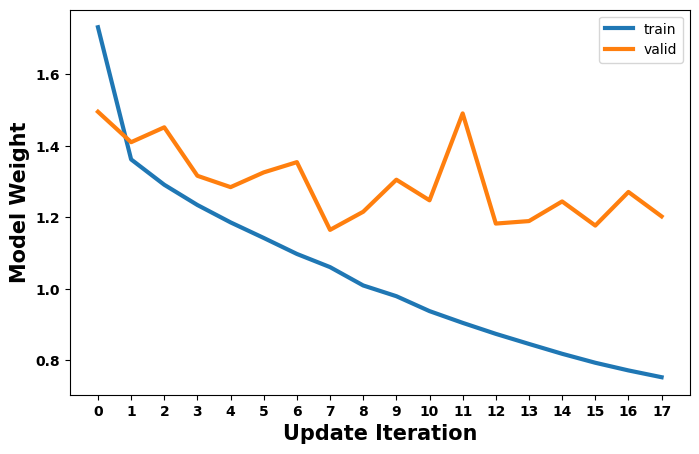

In [132]:
figure = plt.figure(figsize = (8, 5))
plt.plot(np.sqrt(history.history["loss"]), linewidth = 3, label = "train")
plt.plot(np.sqrt(history.history["val_loss"]), linewidth = 3, label = "valid")
plt.xlabel("Update Iteration", fontsize = 15, fontweight = "bold")
plt.ylabel("Model Weight", fontsize = 15, fontweight = "bold")
plt.xticks(list(range(0, len(history.history["loss"]))) ,fontsize = 10, fontweight = "bold")
plt.yticks( fontsize = 10, fontweight = "bold")
plt.legend()
plt.show()

In [133]:
simplecdr.save("..//Models//combo_cdr_gcn_more_dropout_trained_and_not_activated")

INFO:tensorflow:Assets written to: ..//Models//combo_cdr_gcn_more_dropout_trained_and_not_activated/assets


INFO:tensorflow:Assets written to: ..//Models//combo_cdr_gcn_more_dropout_trained_and_not_activated/assets


In [134]:
simplecdr = tf.keras.models.load_model("..//Models//combo_cdr_gcn_more_dropout_trained_and_not_activated")

In [135]:
dropout1 = 0.10
dropout2 = 0.20
simplecdr_true = deepcdrgcn(True, dropout1, dropout2)
simplecdr_true.set_weights(simplecdr.get_weights())
simplecdr_true.save("..//Models//combo_cdr_gcn_more_dropout_trained_and_not_activated_post_activated")

/home/statgrads/vpiyush2/.conda/envs/tensorflow-gpu-2.9-custom/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


INFO:tensorflow:Assets written to: ..//Models//combo_cdr_gcn_more_dropout_trained_and_not_activated_post_activated/assets


INFO:tensorflow:Assets written to: ..//Models//combo_cdr_gcn_more_dropout_trained_and_not_activated_post_activated/assets


In [136]:
val_preds = simplecdr.predict([ valid_gcn_feats, valid_adj_list,
                           omics_gen_copy_number_gen_expr_valid, 
                           omics_gen_methyl_valid, omics_gen_mut_valid], batch_size = 32)

542/542 [==============================] - 3s 4ms/step


In [137]:
import matplotlib.pyplot as plt

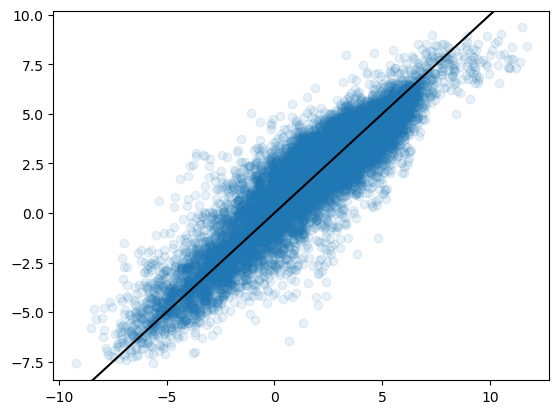

In [138]:
plt.scatter(y_valid.reshape(-1,1), val_preds, alpha = 0.1)
plt.axline((0,0), slope = 1, c = "black")
plt.show()

In [139]:
from scipy.stats import pearsonr

In [140]:
res = pearsonr(y_valid.tolist(), val_preds.tolist())

In [141]:
res

(array([0.9124183678192516], dtype=object), 0.0)

In [142]:
res[0][0]

0.9124183678192516

In [143]:
# stacked_preds = [simplecdr.predict([ valid_gcn_feats, valid_adj_list,
#                            omics_gen_copy_number_gen_expr_valid, 
#                            omics_gen_methyl_valid, omics_gen_mut_valid], batch_size = 64, verbose = 0) for i in range(0, 100)]